Luqman Haries

1301180072

DATAMINING IF-41-GAB01

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read datasets wiki
df_train = pd.read_csv('https://raw.githubusercontent.com/heexid/Tugas-Besar-Data-Mining-Fraud-detection-at-self-checkouts-in-retail/main/Datasets/raw/DMC_2019_task/train.csv',sep='|', quotechar='"',engine='python')

#replace ? to Nan
df_train.replace("?", np.NaN, inplace = True)
df_train[df_train.isna().any(axis = 1)]

#result
df_train

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0
...,...,...,...,...,...,...,...,...,...,...
1874,1,321,76.03,8,7,2,0.071651,0.236854,0.347826,0
1875,1,397,41.89,5,5,0,0.065491,0.105516,0.192308,1
1876,4,316,41.83,5,8,1,0.094937,0.132373,0.166667,0
1877,2,685,62.68,1,6,2,0.035036,0.091504,0.041667,0


In [ ]:
#read datasets wiki
df_test = pd.read_csv('https://raw.githubusercontent.com/heexid/Tugas-Besar-Data-Mining-Fraud-detection-at-self-checkouts-in-retail/main/Datasets/raw/DMC_2019_task/test.csv',sep='|', quotechar='"',engine='python')
df_test_class = pd.read_csv('https://raw.githubusercontent.com/heexid/Tugas-Besar-Data-Mining-Fraud-detection-at-self-checkouts-in-retail/main/Datasets/raw/DMC-2019-realclass.csv',sep='|', quotechar='"',engine='python')

#replace ? to Nan
df_test.replace("?", np.NaN, inplace = True)
df_test[df_test.isna().any(axis = 1)]

#merge df_test_class and df_test
df_test['fraud'] = df_test_class.values
df_test


,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429,0
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259,0
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000,0
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857,0
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526,0
...,...,...,...,...,...,...,...,...,...,...
498116,4,783,59.10,2,2,0,0.012771,0.075479,0.200000,0
498117,1,278,98.90,9,5,4,0.050360,0.355755,0.642857,0
498118,3,300,5.41,6,6,4,0.030000,0.018033,0.666667,0
498119,2,1524,33.97,2,5,3,0.005906,0.022290,0.222222,0


In [ ]:
#save
'''
df_train.to_csv (r'/df_train.csv', index = False, header=True)
df_test.to_csv (r'/df_test.csv', index = False, header=True)
'''

"\ndf_train.to_csv (r'/df_train.csv', index = False, header=True)\ndf_test.to_csv (r'/df_test.csv', index = False, header=True)\n"

#PREPROSES

In [ ]:
#missing value checker
df_train.isna().sum()

trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
fraud                        0
dtype: int64

In [ ]:
#Noise Checker
df_train.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000


In [ ]:
#Duplicate Checker
df_train.duplicated().sum()

0

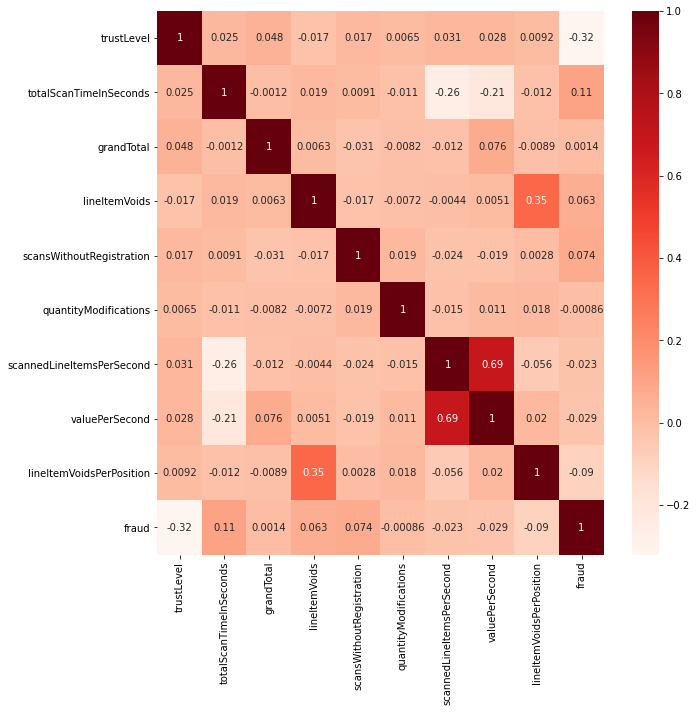

In [ ]:
#Atribut Selection with heatmap correlation
plt.figure(figsize=(10,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with output variable
cor_target = abs(cor["fraud"])

#CREATE MODEL

In [ ]:
#getting all feateru 
#feature_names = df_train.columns.difference(['fraud'])

In [ ]:
#getting feature importance from corr to classification to X and label to Y 
feature_names = ['trustLevel','totalScanTimeInSeconds','scansWithoutRegistration','lineItemVoidsPerPosition']

In [ ]:
#getting train and test to variable
X_train = df_train[feature_names]
y_train = df_train['fraud']

X_test = df_test[feature_names]
y_test = df_test['fraud']

In [ ]:
#Apply scalling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#KNN

In [ ]:
#knn k = 5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(weights = 'distance', n_neighbors = 5, metric='euclidean')
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.3f} % '
     .format(knn.score(X_train, y_train) * 100))
print('Accuracy of K-NN classifier on test set: {:.3f} %'
     .format(knn.score(X_test, y_test) * 100))

'''
yhat = knn.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy * 100))
'''

Accuracy of K-NN classifier on training set: 100.000 % 
Accuracy of K-NN classifier on test set: 94.013 %


"\nyhat = knn.predict(X_test)\n# evaluate predictions\naccuracy = accuracy_score(y_test, yhat)\nprint('Accuracy: %.3f' % (accuracy * 100))\n"

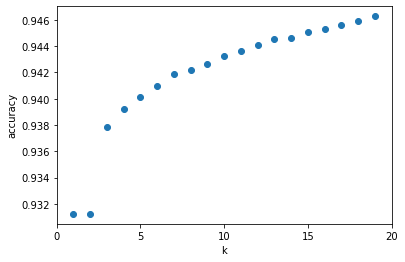

In [ ]:
def explore():
  #explorasi knn k= [1..20]
  k_range = range(1, 20)
  scores = []

  for k in k_range:
      knn = KNeighborsClassifier(weights = 'distance', n_neighbors = k, metric='euclidean')
      knn.fit(X_train, y_train)
      scores.append(knn.score(X_test, y_test))
  plt.figure()
  plt.xlabel('k')
  plt.ylabel('accuracy')
  plt.scatter(k_range, scores)
  plt.xticks([0,5,10,15,20])

explore()

#NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.3f} %'
     .format(gnb.score(X_train, y_train) * 100))
print('Accuracy of GNB classifier on test set: {:.3f} %'
     .format(gnb.score(X_test, y_test) * 100))

'''
yhat = gnb.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy * 100))
'''

Accuracy of GNB classifier on training set: 92.869 %
Accuracy of GNB classifier on test set: 92.104 %


"\nyhat = gnb.predict(X_test)\n# evaluate predictions\naccuracy = accuracy_score(y_test, yhat)\nprint('Accuracy: %.3f' % (accuracy * 100))\n"

#DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.3f} %'
     .format(clf2.score(X_train, y_train) * 100))
print('Accuracy of Decision Tree classifier on test set: {:.3f} %'
     .format(clf2.score(X_test, y_test) * 100))

'''
yhat = clf2.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy * 100))
'''


Accuracy of Decision Tree classifier on training set: 94.944 %
Accuracy of Decision Tree classifier on test set: 94.391 %


"\nyhat = clf2.predict(X_test)\n# evaluate predictions\naccuracy = accuracy_score(y_test, yhat)\nprint('Accuracy: %.3f' % (accuracy * 100))\n"

In [ ]:
# F1 score
from sklearn.metrics import f1_score as f1

#knn
print("F1-SCORE KNN",f1(y_test,knn.predict(X_test),average='micro'))

#gausian
print("F1-SCORE GNB",f1(y_test,gnb.predict(X_test),average='micro'))

#decisiontree
print("F1-SCORE decision tree",f1(y_test,clf2.predict(X_test),average='micro'))


F1-SCORE KNN 0.9401269972556868
F1-SCORE GNB 0.9210392655599744
F1-SCORE decision tree 0.9439051957255365


#REFERENCE
https://github.com/kozodoi/DMC_2019/blob/master/var_importance.pdf

https://www.geeksforgeeks.org/attribute-subset-selection-in-data-mining/